In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-set/loan_data_set.csv


In [2]:
import pandas as pd
data = pd.read_csv("/kaggle/input/loan-data-set/loan_data_set.csv")
print("Dataset load successfullly!")

Dataset load successfullly!


Let's know our data

In [3]:
#see head of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#shape of data ---> 614 rows and 13 columns
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#It only predicts the numerical data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#To describe categorical columns
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
#get numerocal columns names
numericalCols = data.select_dtypes(['float64','int64']).columns
numericalCols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [9]:
#get Categorical columns names
categoricalCols = data.select_dtypes(['object']).columns
categoricalCols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
#it is used to check the cross-tabulation of two or more factors
pd.crosstab(data['Credit_History'], data['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


'As we can see that ApplicantIncome and CoapplicantIncome columns has large Standard Deviation and more outliers.\nwhile LoanAmount and Loan_Amount_Term columns has less Standard Deviation and less outliers.'

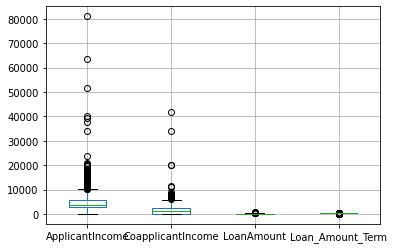

In [11]:
#draw a boxplot to check the outliers
data.boxplot(column=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                     'Loan_Amount_Term'])
'''As we can see that ApplicantIncome and CoapplicantIncome columns has large Standard Deviation and more outliers.
while LoanAmount and Loan_Amount_Term columns has less Standard Deviation and less outliers.'''

'See! Data is left skewed. We have to convert it normal Distribution'

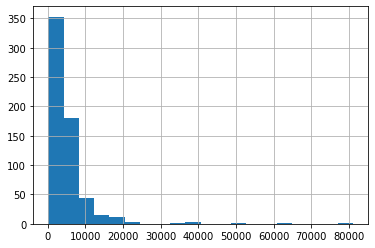

In [12]:
#By using Histogram, lets  check the distribution of Numerical columns one by one.
data['ApplicantIncome'].hist(bins=20)
'''See! Data is left skewed. We have to convert it normal Distribution'''

'Again, data is left skewed'

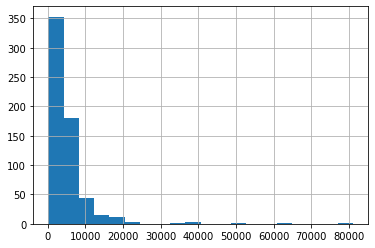

In [13]:
data['ApplicantIncome'].hist(bins=20)
'''Again, data is left skewed'''

'It looks like normal distributed.'

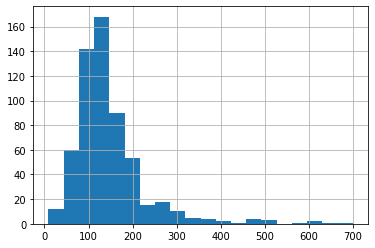

In [14]:
data['LoanAmount'].hist(bins=20)
'''It looks like normal distributed.'''

'Not showing any ditribution, hard to say any thing.'

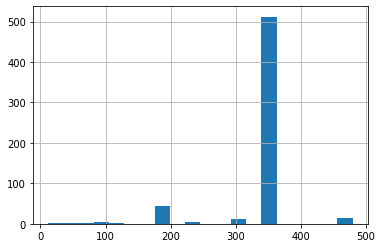

In [15]:
data['Loan_Amount_Term'].hist(bins=20)
'''Not showing any ditribution, hard to say any thing.'''

**Preprocessing of Data**

As, we see there are missing values in our data and some columns needs to normalized.

*handle missing values*


In [16]:
#tell how  many entries are missing in each columns
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
#for categorical columns use to fillup the values using mode 
data['Gender']= data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']= data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']= data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']= data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [18]:
'''numerical columns has not normally distributed. So, median is better for imputation.'''
#for categorical columns use to fillup the values using median 
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
#Credit_History has only two unique values 0 and 1, it's better to use mode for imputation.
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [19]:
data.isnull().sum()
'''See! all the missing values are filled successfully'''

'See! all the missing values are filled successfully'

*handle skewed numerical columns*

In [20]:
#import libraries
import numpy as np

'ApplicantIncome before normalization'

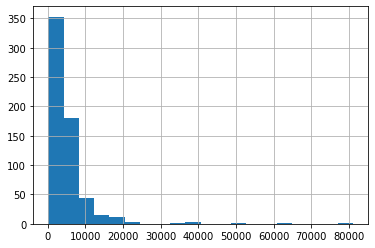

In [21]:
data['ApplicantIncome'].hist(bins=20)
'''ApplicantIncome before normalization'''

In [22]:
#apply normalization using log
data['ApplicantIncome_log']= np.log(data['ApplicantIncome'])

'ApplicantIncome_log before normalization'

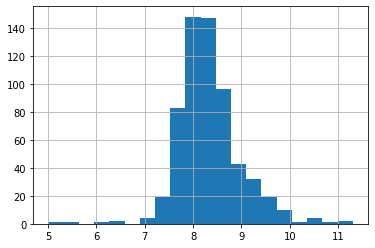

In [23]:
data['ApplicantIncome_log'].hist(bins=20)
'''ApplicantIncome_log before normalization'''

<AxesSubplot:>

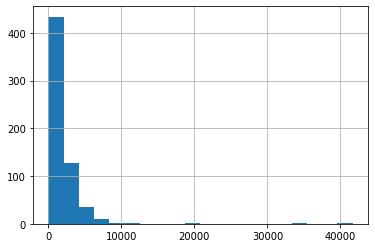

In [24]:
data['CoapplicantIncome'].hist(bins=20)
#data['CoapplicantIncome_log']= np.log(data['CoapplicantIncome'])
#data['CoapplicantIncome_log'].hist(bins=20)

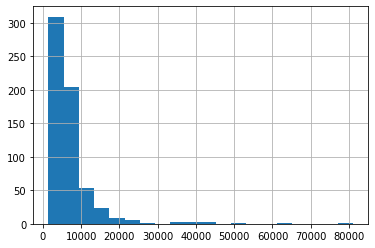

In [25]:
# create a new variable of totalIncome 
data['totalIncome']= data['CoapplicantIncome'] + data['ApplicantIncome']
data['totalIncome'].hist(bins=20)
'''totalIncome before normalization'''
#normalize it
data['totalIncome_log']= np.log(data['totalIncome'])

'totalIncome after normalization'

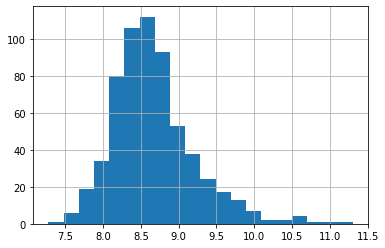

In [26]:
data['totalIncome_log'].hist(bins=20)
'''totalIncome after normalization'''

'LoanAmount Before Normalization'

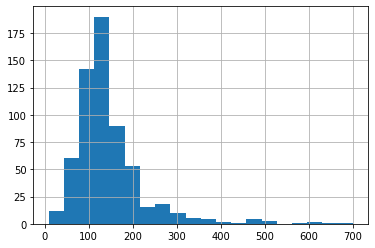

In [27]:
data['LoanAmount'].hist(bins=20)
'''LoanAmount Before Normalization'''

In [28]:
data['LoanAmount_log']= np.log(data['LoanAmount'])

'LoanAmount Before Normalization'

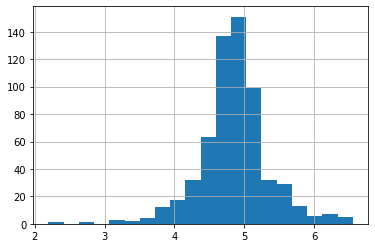

In [29]:
data['LoanAmount_log'].hist(bins=20)
'''LoanAmount Before Normalization'''

'Loan_Amount_Term Before Normalization'

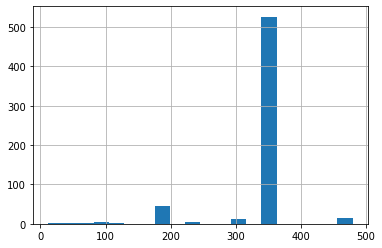

In [30]:
data['Loan_Amount_Term'].hist(bins=20)
'''Loan_Amount_Term Before Normalization'''

In [31]:
data['Loan_Amount_Term_log']= np.log(data['Loan_Amount_Term'])

'Loan_Amount_Term Before Normalization'

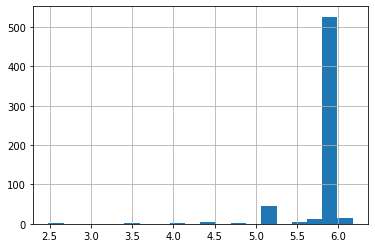

In [32]:
data['Loan_Amount_Term_log'].hist(bins=20)
'''Loan_Amount_Term Before Normalization'''

In [33]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_log,totalIncome,totalIncome_log,LoanAmount_log,Loan_Amount_Term_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,8.341213,7024.705081,8.669414,4.857250,5.803234
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.645263,6458.663872,0.545102,0.495996,0.312699
min,150.000000,0.000000,9.000000,12.000000,0.000000,5.010635,1442.000000,7.273786,2.197225,2.484907
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,7.964677,4166.000000,8.334712,4.607658,5.886104
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,8.246040,5416.500000,8.597205,4.852030,5.886104
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,8.664750,7521.750000,8.925549,5.104426,5.886104
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,11.302204,81000.000000,11.302204,6.551080,6.173786


In [34]:
data.shape

(614, 18)

**selection of varaibles and train test split**

In [35]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome_log', 'totalIncome', 'totalIncome_log',
       'LoanAmount_log', 'Loan_Amount_Term_log'],
      dtype='object')

In [36]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,totalIncome,totalIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674026,5849.0,8.674026,4.852030,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109,6091.0,8.714568,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006368,3000.0,8.006368,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.856707,4941.0,8.505323,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515,6000.0,8.699515,4.948760,5.886104


In [37]:
#selection of columns
X=data.iloc[:,np.r_[1:6,10:12,13,15:18]]
y=data.iloc[:,12]

In [38]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [39]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,totalIncome_log,LoanAmount_log,Loan_Amount_Term_log
90,Male,Yes,0,Graduate,No,1.0,Semiurban,7.992269,8.675564,4.875197,5.886104
533,Male,No,1,Graduate,No,1.0,Semiurban,9.328123,9.328123,5.278115,5.886104
452,Male,Yes,0,Graduate,No,0.0,Rural,8.280964,8.644883,5.003946,5.886104
355,Female,No,0,Graduate,No,1.0,Urban,8.246172,8.246172,4.753590,5.192957
266,Male,Yes,2,Graduate,No,1.0,Semiurban,8.457018,8.715224,5.010635,5.886104
...,...,...,...,...,...,...,...,...,...,...,...
277,Male,Yes,0,Graduate,No,1.0,Urban,8.040125,8.390041,4.382027,5.886104
9,Male,Yes,1,Graduate,No,1.0,Semiurban,9.460398,10.077819,5.855072,5.886104
359,Male,Yes,3+,Graduate,No,1.0,Semiurban,8.550048,9.028099,5.298317,5.886104
192,Male,Yes,0,Not Graduate,No,1.0,Urban,8.705000,8.705000,5.075174,5.886104


**convert categorical columns values into numerical**

In [40]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [41]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply Ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_test[object_cols] = ordinal_encoder.transform(X_test[object_cols])

In [42]:
# Make copy to avoid changing original data 
label_y_train = y_train.copy()
label_y_test = y_test.copy()

#apply encoder on y split variables
label_encoder = LabelEncoder()
label_y_train =  label_encoder.fit_transform(label_y_train)
label_y_test =  label_encoder.fit_transform(label_y_test)

**Apply Decision Tree models**

In [43]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(label_X_train, label_y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
#prediction of data
pred = DTClassifier.predict(label_X_test)
pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

**Accuracy of model**

In [45]:
from sklearn import metrics
print("Acuracy of Decision Tree model is : ", metrics.accuracy_score(pred, label_y_test))

Acuracy of Decision Tree model is :  0.7398373983739838


**Apply Naive Baise Model**

In [46]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(label_X_train, label_y_train)
NB_pred = NBClassifier.predict(label_X_test)
print("Acuracy of Naive Bayes model is : ", metrics.accuracy_score(NB_pred, label_y_test))

Acuracy of Naive Bayes model is :  0.8211382113821138


**Apply Random Forest CLassifier model**

In [47]:
from sklearn.ensemble import RandomForestClassifier

RFClassifier = RandomForestClassifier(n_estimators=8, random_state=0)
RFClassifier.fit(label_X_train, label_y_train)
RFpred = RFClassifier.predict(label_X_test)

****

**Support Vector machine**

In [48]:
from sklearn.svm import SVC
clf = SVC(kernel='sigmoid', C=1)
clf.fit(label_X_train, label_y_train)
clf_pred = clf.predict(label_X_test)
print("Acuracy of Support vector Machine model is : ", metrics.accuracy_score(clf_pred, label_y_test))

Acuracy of Support vector Machine model is :  0.7317073170731707


**Logistic Regression Model**

In [49]:
#logistic model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(label_X_train, label_y_train)
log_pred = logistic_model.predict(label_X_test)

**Accuracy of all applied models**

We, can see that SVM model has high accuracy than all other models

In [50]:
print("Acuracy of Randon Forest model is : ", metrics.accuracy_score(RFpred, label_y_test))
print("Acuracy of Decision Tree model is : ", metrics.accuracy_score(pred, label_y_test))
print("Acuracy of Naive Bayes model is : ", metrics.accuracy_score(NB_pred, label_y_test))
print("Acuracy of Logistic Regression model is : ", metrics.accuracy_score(log_pred, label_y_test))
print("Acuracy of Support vector Machine model is : ", metrics.accuracy_score(clf_pred, label_y_test))

Acuracy of Randon Forest model is :  0.6910569105691057
Acuracy of Decision Tree model is :  0.7398373983739838
Acuracy of Naive Bayes model is :  0.8211382113821138
Acuracy of Logistic Regression model is :  0.8292682926829268
Acuracy of Support vector Machine model is :  0.7317073170731707
